# Week 2 Problem Set

## Cohort Sessions

**CS1.** *Binary Heap:* Write the following functions:



- `parent_of(index)`: returns the index of node's parent
- `left_of(index)`: returns the index of node's left child
- `right_of(index)`: returns the index of node's right child
- `max_child(array, index, heap_size)`: returns the index of node's largest child. You can assume that the node has at least one child.

Hint: 
- `index` starts from 0. 
- You can refer to the pseudocode in [Binary Heap and Heapsort](https://github.com/Data-Driven-World/d2w_notes/blob/master/BinaryHeap_Heapsort.ipynb).
- When finding the index of the largest child, consider the following cases:
    1. when the node only has one child
    2. when the node has two children


In [4]:
def parent_of(index):
    ###BEGIN SOLUTION
    return (index - 1) //2 
    ###END SOLUTION
    pass

In [5]:
assert parent_of(1) == 0 
assert parent_of(2) == 0
assert parent_of(5) == 2
assert parent_of(6) == 2

In [6]:
def left_of(index):
    ###BEGIN SOLUTION
    return 2*index + 1
    ###END SOLUTION

In [7]:
assert left_of(0) == 1
assert left_of(1) == 3
assert left_of(3) == 7
assert left_of(6) == 13

In [8]:
def right_of(index):
    ###BEGIN SOLUTION
    return 2*index + 2
    ###END SOLUTION

In [9]:
assert right_of(0) == 2
assert right_of(1) == 4
assert right_of(3) == 8
assert right_of(5) == 12

In [10]:
def max_child(array, index, heap_size):
    ###BEGIN SOLUTION
    # must check that your left child and right child index does not exceed the size of the array
    if (right_of(index) >= heap_size):
        return left_of(index) # assume that i have the left child
    else:
        if array[left_of(index)] > array[right_of(index)]:
            return left_of(index)
        else:
            return right_of(index)
    ###END SOLUTION
    pass

In [11]:
maxheap = [16, 14, 10, 8, 7, 9, 3, 2, 4, 1] #This is not actually a max heap cause of 2 4
assert max_child(maxheap, 0, len(maxheap)) == 1
assert max_child(maxheap, 2, len(maxheap)) == 5
assert max_child(maxheap, 3, len(maxheap)) == 8
assert max_child(maxheap, 1, len(maxheap)) == 3

**CS2.** *Binary Heap:* Write two functions 

- `max_heapify(array, index, size)`: that moves the node down so as to satisfy the heap property.  The first argument is the array that contains the heap. The second argument is an integer index where to start the process of heapifying. The third argument is the size of the heap in the array. This argument will be useful in heapsort algorithm where we take out the elements in the array from the heap. 

Hint: You should make use of `size` argument to determine the last element of the heap in the array rather than `len(array)`.

- `build_max_heap(heap)`: that builds the max heap from any array. This function should make use of `max_heapify()` in its definition.

Hint: You can refer to the pseudocode in [Binary Heap and Heapsort](https://github.com/Data-Driven-World/d2w_notes/blob/master/BinaryHeap_Heapsort.ipynb) for the above functions.

In [12]:
# only call this on a node which descendants of "index" satisfy heap property
def max_heapify(array, index, size):
    ###BEGIN SOLUTION
    cur_index = index
    # check if I still have children:
    while left_of(cur_index) < size:
        swapped = False
        # get the index of the bigger child
        max_child_idx = max_child(array, cur_index, size)
        # swap if my bigger child is bigger than current value
        if array[max_child_idx] > array[cur_index]:
            array[max_child_idx], array[cur_index] = array[cur_index], array[max_child_idx]
            swapped = True
        if (swapped == False): break
        # update current index
        cur_index = max_child_idx

In [13]:
result = [16, 4, 10, 14, 7, 9, 3, 2, 8, 1]
max_heapify(result, 1, len(result))
print(result)
assert result == [16, 14, 10, 8, 7, 9, 3, 2, 4, 1]

[16, 14, 10, 8, 7, 9, 3, 2, 4, 1]


In [14]:
def build_max_heap(array):
    ###BEGIN SOLUTION
    for i in range(len(array)//2-1, -1, -1): # second arg -1 because want to end at 0
        max_heapify(array, i, len(array))
    ###END SOLUTION
    pass

In [15]:
array = [4, 1, 3, 2, 16, 9, 10, 14, 8, 7]

build_max_heap(array)
print(array)
assert array == [16, 14, 10, 8, 7, 9, 3, 2, 4, 1]

[16, 14, 10, 8, 7, 9, 3, 2, 4, 1]


**CS3.** *Heapsort:* Implement heapsort algorithm following the pseudocode in [Binary Heap and Heapsort](https://github.com/Data-Driven-World/d2w_notes/blob/master/BinaryHeap_Heapsort.ipynb).



In [3]:
def heapsort(array):
    ###BEGIN SOLUTION
    # 1. build max heap
    # 2. swap first and last element
    # 3. "reduce" the size of the heap by 1 
    # 4. max heapify
    # 5. repeat step 2

    heap_size = len(array)
    build_max_heap(array)

    while heap_size > 0:
        # swap 
        array[0], array[heap_size-1] = array[heap_size-1], array[0]
        # reduce heap size
        heap_size -= 1
        # max_heapify(input_array, start, end)
        max_heapify(array, 0, heap_size)

    ###END SOLUTION

In [14]:
array = [16, 14, 10, 8, 7, 9, 3, 2, 4, 1]
heapsort(array)
print(array)
assert array == [1, 2, 3, 4, 7, 8, 9, 10, 14, 16]

[1, 2, 3, 4, 7, 8, 9, 10, 14, 16]


**CS4.** Measure computational time of Python's built-in sort function by filling the template below. Hint: 
- You will need the function `gen_random_int()` from Week 01 Problem Set.
- Use `sorted(list)` function of Python's list See [Python's Sorting HOW TO Documentation](https://docs.python.org/3.3/howto/sorting.html). 

<function sort_custom at 0x000001167E3BBA60>
<function gen_random_int at 0x000001167E3BB9D0>
[0.0, 0.0, 0.0, 0.0009975433349609375, 0.014960050582885742, 0.30817437171936035, 4.347931146621704]


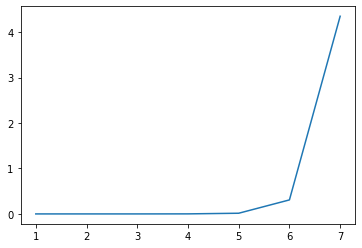

In [4]:
import time
import random
import matplotlib.pyplot as plt

# the first argument is a FUNCTION
# you CALL the function later
def run_function(f, x):
    start = time.time()
    f(x) # CALLing function f, with the brackets ()
    end = time.time()
    return end-start

def gen_random_int(number, seed):
    ###BEGIN SOLUTION
    result = list(range(0, number+1))
    random.seed(seed)
    random.shuffle(result)
    return result
    ###END SOLUTION

def sort_custom(array):
    return sorted(array)

time_builtin = []
# set the maximum power for 10^power number of inputs
maxpower = 7
power = []
print(sort_custom)
print(gen_random_int)

for n in range(1, maxpower + 1):
    # create array for 10^1, 10^2, etc 
    # use seed 100
    array = None
    
    # call run_function with sorted() and array as arguments
    # result = run_function(None, None) 
    
    ###BEGIN SOLUTION
    power.append(n) # 1, 2, ....,  7
    array = gen_random_int(10**n, 100)
    result = run_function(sort_custom, array) # function as an INPUT
    ###END SOLUTION
    
    time_builtin.append(result)


print(time_builtin)
plt.plot(power, time_builtin)
plt.show()

In [9]:
help(list)

Help on class list in module builtins:

class list(object)
 |  list(iterable=(), /)
 |  
 |  Built-in mutable sequence.
 |  
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self))